<a href="https://colab.research.google.com/github/Yilmaz-Enes/BilgSistLab/blob/main/gates_perceptron_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Ibrahim R Hallac
# https://github.com/irhallac
# Lojik kapıların Perceptron öğrenme algoritmasıyla modellenmesi

# credits for the Perceptron class: Aashir Javed
# Available: github.com/aashirjaved
# Perceptron-Machine-Learning-Using-Python-
# File: Perceptron.py

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

In [16]:
df = pandas.read_csv('https://raw.githubusercontent.com/irhallac/SisLab/631e5e0b531d22393d9dad47623a0e1de76d8f34/hw_data/data_456.csv', header=None)
df

,0,1,2,3,4,5,6
0,NaN,ozellik-1,ozellik-2,ozellik-3,ozellik-4,ozellik-5,cikis
1,0.0,-8.12968190679627,-6.193359549052686,5.296302859373585,8.955261907399198,-3.266606435209017,1
2,1.0,9.70581547662138,-5.275624985521887,6.012196162926479,-5.893469010527763,-6.676234389817678,0
3,2.0,-7.944386676195875,-6.1307355209580106,4.100219998608857,9.62691446949189,-4.119301526668344,1
4,3.0,9.604341324804054,-5.886795496726163,7.894497590219768,-6.535568200430749,-6.916880939063676,0
...,...,...,...,...,...,...,...
122,121.0,-7.976214780006213,-5.9585828761242405,6.895382363704728,7.0638633233474115,-4.32705580451201,1
123,122.0,-9.561096779433276,-4.908041745169875,7.1787527527480055,9.88627665358059,-4.856857228705839,1
124,123.0,9.719167797471869,-6.16386067136473,6.4082850700934975,-6.020553953426487,-8.105607370800897,0
125,124.0,11.386863713016313,-6.5397133782150885,6.391346597987178,-7.599466808761798,-7.733750480943999,0


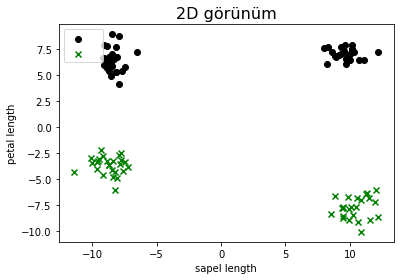

In [17]:
cikis = df.iloc[1:101, 6].values
giris = df.iloc[1:101, [1, 3, 5]].values

cikis = cikis.astype(float)
giris = giris.astype(float)

plt.title('2D görünüm', fontsize=16)

plt.scatter(giris[:50, 0], giris[:50, 1], color='black', marker='o', label=' ')
plt.scatter(giris[50:100, 0], giris[50:100, -1], color='green', marker='x', label=' ')
plt.xlabel('sapel length')
plt.ylabel('petal length')
plt.legend(loc='upper left')

plt.show()

In [18]:
class Perceptron(object): 
    def __init__(self, ogrenme_orani=0.1, iter_sayisi=10):
        self.ogrenme_orani = ogrenme_orani
        self.iter_sayisi = iter_sayisi

    def ogren(self, X, y):
        self.w = np.zeros(1 + X.shape[1])
        #self.w = np.random.rand((1 + X.shape[1])) * 2
        self.hatalar = []
        for _ in range(self.iter_sayisi):
            hata = 0
            for xi, hedef in zip(X, y):
                degisim = self.ogrenme_orani * (hedef - self.tahmin(xi))
                self.w[1:] += degisim * xi
                self.w[0] += degisim
                hata += int(degisim != 0.0)
            self.hatalar.append(hata)
        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def tahmin(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, 0)

In [19]:
siniflandirici = Perceptron(ogrenme_orani=0.1, iter_sayisi=10)

In [20]:
siniflandirici.ogren(giris, cikis)

In [21]:
siniflandirici.w
     

array([ 0.        , -1.76656891,  0.26970046,  0.3059942 ])

In [22]:
siniflandirici.hatalar

[2, 0, 0, 0, 0, 0, 0, 0, 0, 0]

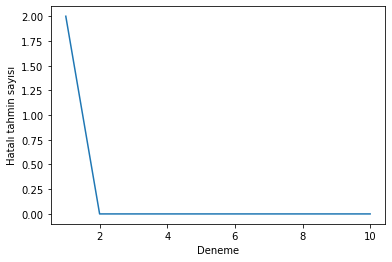

In [23]:
plt.plot(range(1, len(siniflandirici.hatalar) + 1), siniflandirici.hatalar)
plt.xlabel('Deneme')
plt.ylabel('Hatalı tahmin sayısı')
plt.show()